In [2]:
import osmnx as ox
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import networkx as nx

In [8]:
# get features in a location
poi = ox.features_from_address("kitale", {"amenity" : ["school","clinic"]}, 5000)
print (len(poi))
ox.features_from_place("Uasin Gishu", {"amenity":"school"})
ox.features_from_point((1.0147641204192313, 35.006400345113946), {"amenity":"school"}, 5000)

19


/tmp/ipykernel_6582/3038105550.py:34: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(loc='lower right')


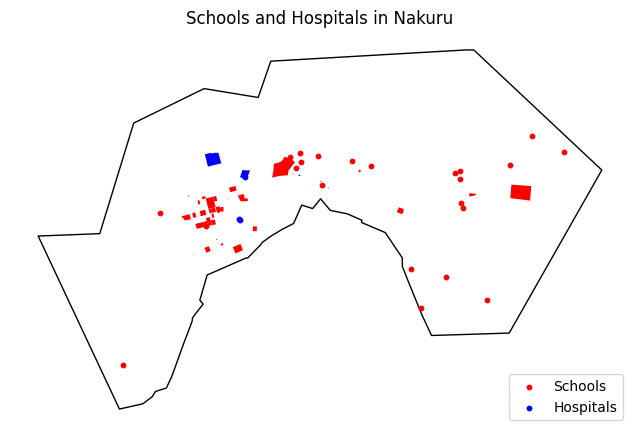

In [69]:
# feature within a sh
gdf = gpd.read_file('Nakuru.shp')

# convert to geometry
nakuru = gdf.geometry.iloc[0]
poi = ox.features_from_polygon(nakuru, {'amenity':['school','hospital']})

fig, ax = plt.subplots(figsize = (8,8))
ax.axis("off")

gdf.plot(
    ax=ax,
    facecolor = 'none',
    edgecolor = 'black',
    linewidth = 1
)

# facecolor applies only to polygons but color applies to all data types
# add schools to map
poi[poi["amenity"] == "school"].plot(
    ax=ax,
    color = 'red',
    markersize = 10,
    label = 'Schools'
)

poi[poi["amenity"] == "hospital"].plot(
    ax=ax,
    color = 'blue',
    markersize = 10,
    label = 'Hospitals'
)
ax.set_title('Schools and Hospitals in Nakuru')
ax.legend(loc='lower right')


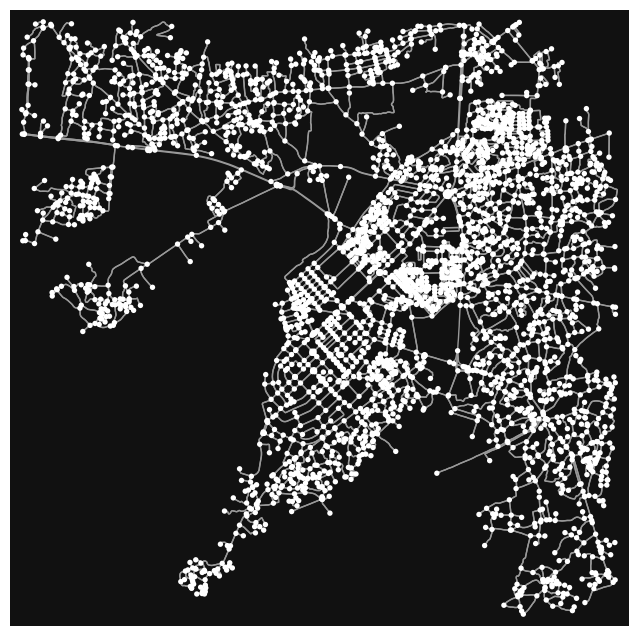

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [38]:
# graph of a 
G = ox.graph_from_address("Kisumu", 5000, network_type="drive")
G = ox.graph_from_place('Nakuru', network_type='bike')
ox.plot_graph(G)

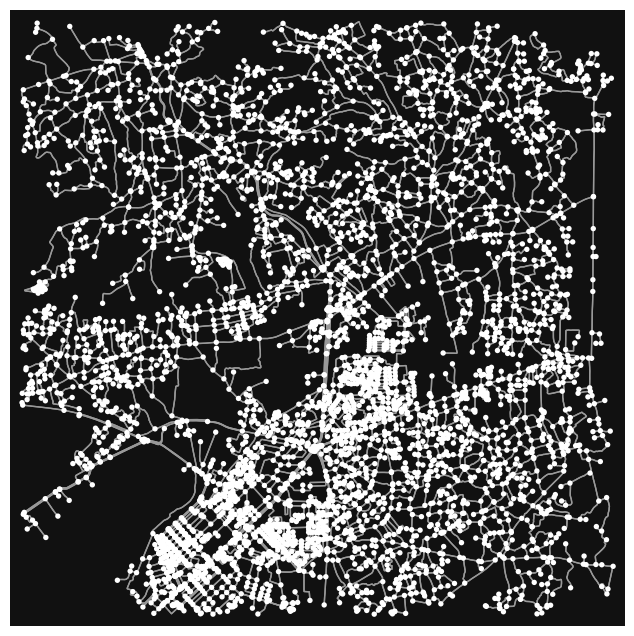

In [6]:
# exporting graphs
G = ox.graph_from_point((-0.06430374950950492, 34.7742681684784), 5000, network_type='walk')
ox.plot_graph(G)
# save to graphml
ox.io.save_graphml(G, filepath = 'kisumu_walk.graphml')
# save to gpkg
ox.io.save_graph_geopackage(G, filepath = 'kisumu_walk.gpkg')


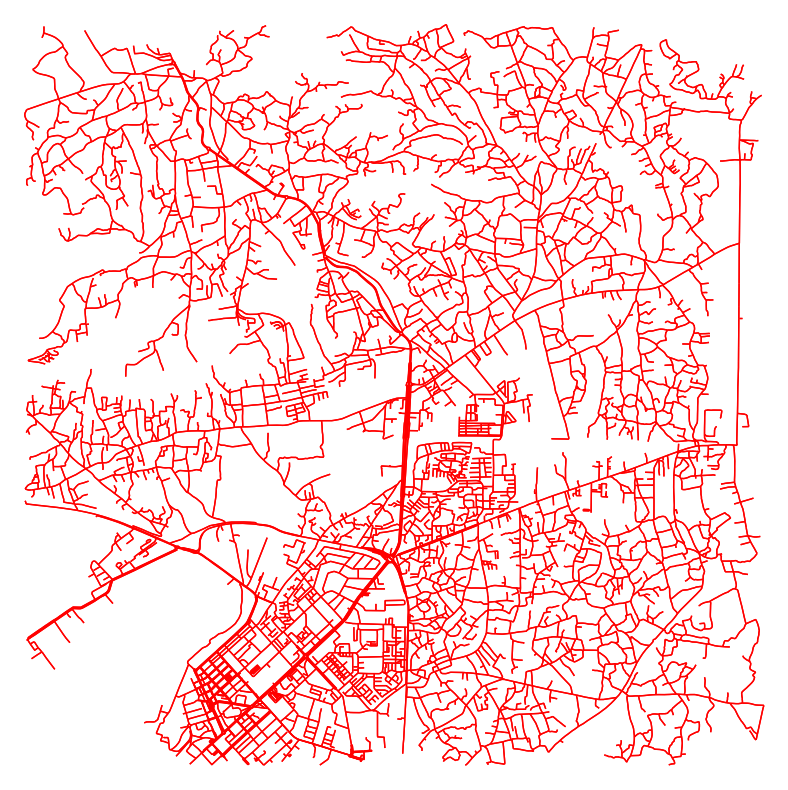

In [35]:
# importing graphs. graphml recommended
G = ox.io.load_graphml('kisumu_walk.graphml')

# plotting the graph
fig, ax = ox.plot_graph(
    G,
    figsize = (10,10),
    bgcolor='white',
    node_size=0,
    node_color='black',
    edge_color='red',
    edge_linewidth=1,
    node_zorder=1
)


In [56]:
# check projection and project
G = ox.graph_from_place("Nakuru", network_type='walk')
ox.projection.is_projected(G.graph["crs"])
G_proj= ox.projection.project_graph(G, to_crs='EPSG:32737')
ox.projection.is_projected(G_proj.graph["crs"])

True

In [65]:
# convert graph to gdf , check projection and project
# convert
G = ox.graph_from_place('Kisumu', network_type='bike')
nodes, edges = ox.convert.graph_to_gdfs(G)
# check projection
ox.projection.is_projected(nodes.crs)
ox.projection.is_projected(edges.crs)
# project and confirm
nodes_proj = ox.projection.project_gdf(nodes, to_crs='EPSG:32737')
ox.projection.is_projected(nodes_proj.crs)
edges_proj = ox.projection.project_gdf(edges, to_crs='EPSG:32737')
ox.projection.is_projected(edges_proj.crs)

True

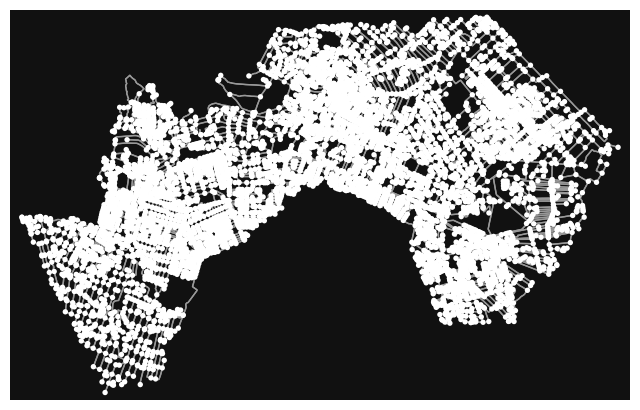

True

In [80]:
# read shapefile, convert to graph, check projection and project
gdf = gpd.read_file("Nakuru.shp")
ox.projection.is_projected(gdf.crs)

# convert to shapely/polygon
nakuru = gdf.geometry.iloc[0]

# get graph from polygon 
G = ox.graph_from_polygon(nakuru, network_type="walk")
ox.plot_graph(G)
# check projection and project
ox.projection.is_projected(G.graph["crs"])
G_proj= ox.projection.project_graph(G, to_crs='EPSG:32737')
ox.projection.is_projected(G_proj.graph["crs"])

# shp to gdf
geom = ox.geocode_to_gdf("Kenya")
type(geom)
geom.head()


In [33]:

# adding speed to graph
G = ox.graph_from_place('Nairobi', network_type = 'drive')
G = ox.project_graph(G)
# ox.projection.is_projected(G_proj.graph["crs"])
nodes, edges = ox.graph_to_gdfs(G)
# print(edges)

# add speed and travel time to graph
ox.routing.add_edge_speeds(G, fallback = 50)
ox.routing.add_edge_travel_times(G)

# finding the fastest paths
y1 = -1.2844868658954904  
x1 = 36.82576311680059
y2 = -1.3292557342262132
x2 = 36.68092964236497

orig = ox.distance.nearest_nodes(G, X=x1, Y=y1)
dest = ox.distance.nearest_nodes(G, X=x2, Y=y2)

routes = list(
    ox.routing.k_shortest_paths(G, orig, dest, k=3, weight='travel_time')
)

print(f"\nFound {len(routes)} alternative routes:")

# find the fastest route
# path_fastest = ox.route_to_gdf(G, routes)

# # find a shortest route by length
# # route = ox.routing.shortest_path(G, orig, dest, weight='length')





Found 1 alternative routes:


AttributeError: module 'osmnx' has no attribute 'route_to_gdf'

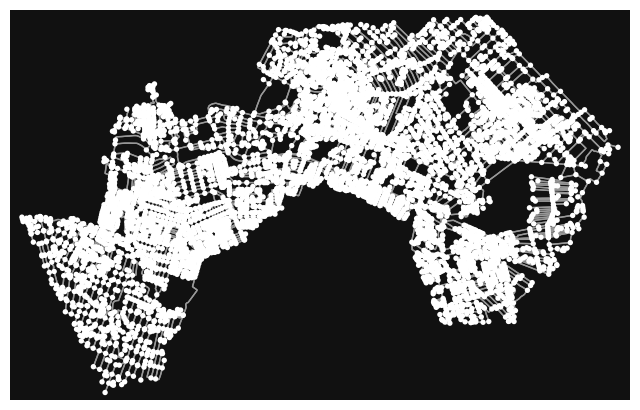

TypeError: Input must be valid geometry objects: MultiDiGraph with 7153 nodes and 18784 edges

In [39]:
# buffer a geom
gdf = gpd.read_file('Nakuru.shp')
G = ox.graph_from_polygon(gdf['geometry'][0], network_type='drive')
ox.plot_graph(G)
ox.utils_geo.buffer_geometry(G, 5000)

Loaded 1 feature(s)
CRS: EPSG:4326
Original geometry type: Polygon

Reprojecting to UTM for accurate buffering...
Buffering geometry by 5000 meters...



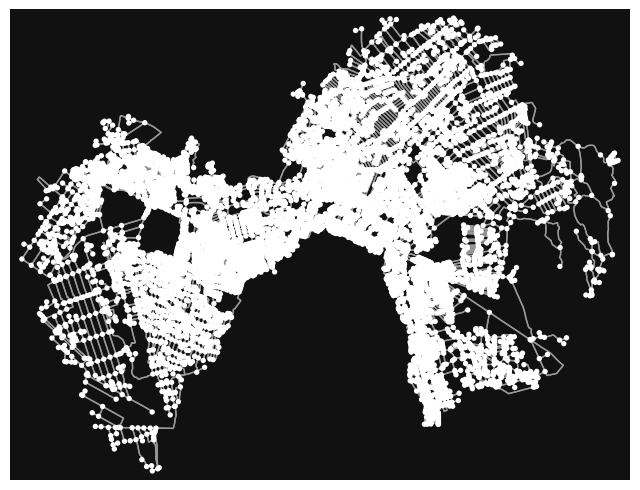

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [43]:
gdf = gpd.read_file('Nakuru.shp')
print(f"Loaded {len(gdf)} feature(s)")
print(f"CRS: {gdf.crs}")

# Get the geometry
geom = gdf['geometry'][0]
print(f"Original geometry type: {geom.geom_type}")

# Ensure geometry is in a projected CRS for accurate buffering
if gdf.crs and gdf.crs.is_geographic:
    print("\nReprojecting to UTM for accurate buffering...")
    # Project to appropriate UTM zone for Nakuru, Kenya (UTM 37S)
    gdf_projected = gdf.to_crs('EPSG:32737')
    geom_projected = gdf_projected['geometry'][0]
else:
    geom_projected = geom

# Buffer by 5000 meters
print("Buffering geometry by 5000 meters...")
buffered_geom = geom_projected.buffer(5000)

# Convert back to WGS84 for OSMnx
buffered_gdf = gpd.GeoDataFrame([1], geometry=[buffered_geom], crs=gdf_projected.crs)
buffered_gdf_wgs84 = buffered_gdf.to_crs('EPSG:4326')
buffered_geom_wgs84 = buffered_gdf_wgs84['geometry'][0]

# Download the street network for the buffered area
print("\nDownloading street network for buffered area...")
G_buffered = ox.graph_from_polygon(buffered_geom_wgs84, network_type='drive')
ox.plot_graph(G_buffered)